In [1]:
import xarray as xr
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cmocean as cmo
from matplotlib import colors
import matplotlib.cm as cm
from PIL import Image
import glob

/home/fisa/anaconda3/envs/Work/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.rcParams["figure.facecolor"] = 'w'

In [3]:
plt.rcParams.update({'hatch.color': 'w'})

In [4]:
wdir = 'R16-09-2022/z02/'

In [5]:
ds = xr.open_mfdataset(wdir + 'ocean_avg*-z0.nc')
ds = ds.squeeze().isel(ocean_time=slice(None,None,10))

In [6]:
ds

<xarray.Dataset>
Dimensions:             (ocean_time: 146, tracer: 12, eta_rho: 242, xi_rho: 322, s_w: 41, boundary: 4, eta_psi: 241, xi_psi: 321, eta_u: 242, xi_u: 321, eta_v: 241, xi_v: 322)
Coordinates:
    lat_psi             (eta_psi, xi_psi) float64 dask.array<chunksize=(241, 321), meta=np.ndarray>
    lat_rho             (eta_rho, xi_rho) float64 dask.array<chunksize=(242, 322), meta=np.ndarray>
    lat_u               (eta_u, xi_u) float64 dask.array<chunksize=(242, 321), meta=np.ndarray>
    lat_v               (eta_v, xi_v) float64 dask.array<chunksize=(241, 322), meta=np.ndarray>
    lon_psi             (eta_psi, xi_psi) float64 dask.array<chunksize=(241, 321), meta=np.ndarray>
    lon_rho             (eta_rho, xi_rho) float64 dask.array<chunksize=(242, 322), meta=np.ndarray>
    lon_u               (eta_u, xi_u) float64 dask.array<chunksize=(242, 321), meta=np.ndarray>
    lon_v               (eta_v, xi_v) float64 dask.array<chunksize=(241, 322), meta=np.ndarray>
  * ocean_time          (ocean_time) datetime64[ns] 2010-01-15T12:00:00 ... 2...
    s_rho               float64 -0.0125
  * s_w                 (s_w) float64 -1.0 -0.975 -0.95 ... -0.05 -0.025 0.0
Dimensions without coordinates: tracer, eta_rho, xi_rho, boundary, eta_psi, xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/117)
    Akk_bak             (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06
    Akp_bak             (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06
    Akt_bak             (ocean_time, tracer) float64 dask.array<chunksize=(1, 12), meta=np.ndarray>
    Akv_bak             (ocean_time) float64 1e-05 1e-05 1e-05 ... 1e-05 1e-05
    B_BIOPLAST_MP_biof  (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 242, 322), meta=np.ndarray>
    B_BIOPLAST_MP_det   (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 242, 322), meta=np.ndarray>
    ...                  ...
    wao                 (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 242, 322), meta=np.ndarray>
    wdiv                (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 242, 322), meta=np.ndarray>
    wfr                 (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 242, 322), meta=np.ndarray>
    wio                 (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 242, 322), meta=np.ndarray>
    wro                 (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 242, 322), meta=np.ndarray>
    xl                  (ocean_time) float64 6.38e+06 6.38e+06 ... 6.38e+06
Attributes: (12/46)
    file:              ocean_avg_00001.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4
    type:              ROMS/TOMS nonlinear model averages file
    title:             A20_v2j
    var_info:          varinfo_a20_v3_fabm_oxydep.dat
    ...                ...
    tiling:            008x016
    history:           Fri Nov 11 12:53:59 2022: ncks -F -d s_rho,40 ocean_av...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    bio_file:          ROMS/Nonlinear/Biology/rfabm.h
    CPP_options:       a20_v3_oxydep, ADD_FSOBC, ADD_M2OBC, ALBEDO_CSIM, ALBE...
    NCO:               4.7.2

In [7]:
hice = ds['hice'].values

In [8]:
cice = hice.copy()

In [9]:
cice[cice<0.1] = np.nan

In [14]:
ox = ds['B_OXYDEP_Oxy'].values
phy = ds['B_OXYDEP_Phy'].values
het = ds['B_OXYDEP_Het'].values
nut = ds['B_OXYDEP_NUT'].values
pom = ds['B_OXYDEP_POM'].values
dom = ds['B_OXYDEP_DOM'].values

In [15]:
ox[ox<0] = 0
phy[phy<0] = 0
het[het<0] = 0
nut[nut<0] = 0
pom[pom<0] = 0
dom[dom<0] = 0

In [52]:
ocean_time = ds['ocean_time'].values

In [23]:
ice_palette = ["#e63946", "#f1faee", "#a8dadc", "#457b9d", "#1d3557"]
ice_cmap = colors.ListedColormap(ice_palette[::-1])
bounds=[0, 0.2, 0.5, 1, 50]
norm = colors.BoundaryNorm(bounds, ice_cmap.N)

In [24]:
phy_palette = ['#b7e4c7', '#95d5b2', '#74c69d', '#52b788', '#40916c', '#2d6a4f', '#1b4332', '#081c15']
phy_cmap = colors.LinearSegmentedColormap.from_list('phy_colormap', phy_palette, N=256)

In [25]:
het_palette = ["#c9cba3","#ffe1a8","#e26d5c","#723d46","#472d30"]
het_cmap = colors.LinearSegmentedColormap.from_list('het_colormap', het_palette, N=256)

In [26]:
nut_palette = ["#ff595e","#ffca3a","#8ac926","#1982c4","#6a4c93"][::-1]
nut_cmap = colors.LinearSegmentedColormap.from_list('nut_colormap', nut_palette, N=256)

In [27]:
dom_palette = ["#001219","#005f73","#0a9396","#94d2bd","#e9d8a6",
               "#ee9b00","#ca6702","#bb3e03","#ae2012","#9b2226"]
dom_cmap = colors.LinearSegmentedColormap.from_list('dom_colormap', dom_palette, N=256)

In [ ]:
pd.date_range()

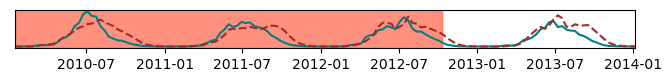

In [70]:
fig, ax = plt.subplots(figsize=(8,0.5))
ax.plot(ocean_time, np.nansum(phy, axis=(1,2)), color='teal')
ax.plot(ocean_time, np.nansum(het, axis=(1,2)), color='brown', ls='--')
ax.set_xlim(ocean_time[0], ocean_time[-1])
ax.axvspan(ocean_time[0], ocean_time[100], color='tomato', alpha=0.7)
ax.set_yticks([])
plt.show()

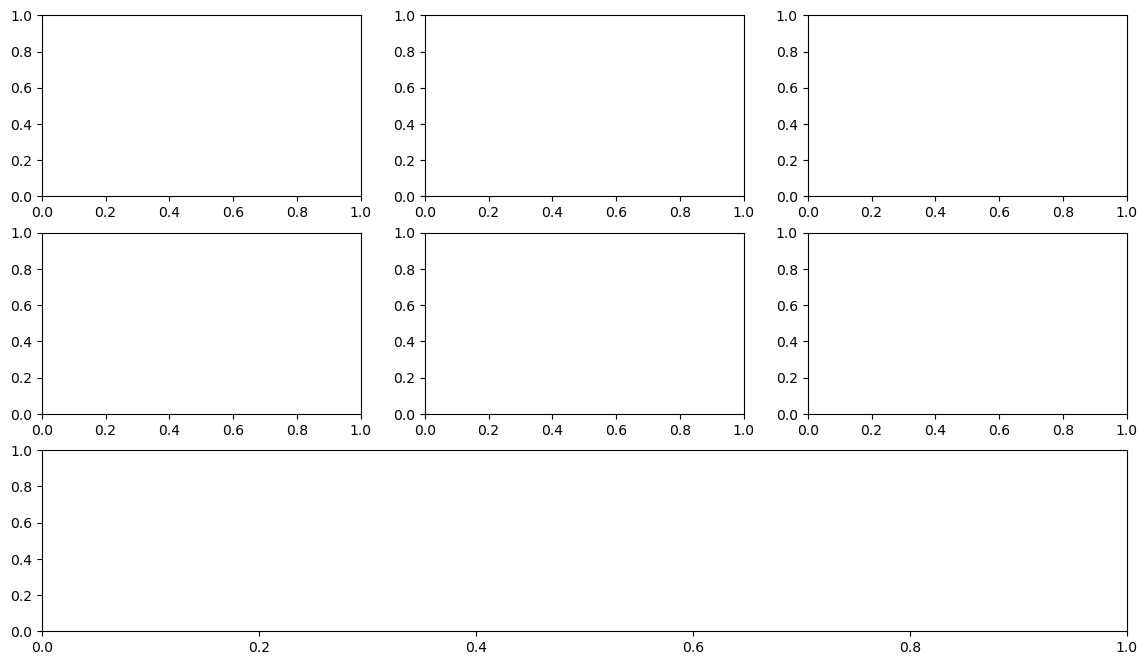

In [127]:
fig, axs = plt.subplots(3,3, figsize=(14,8))


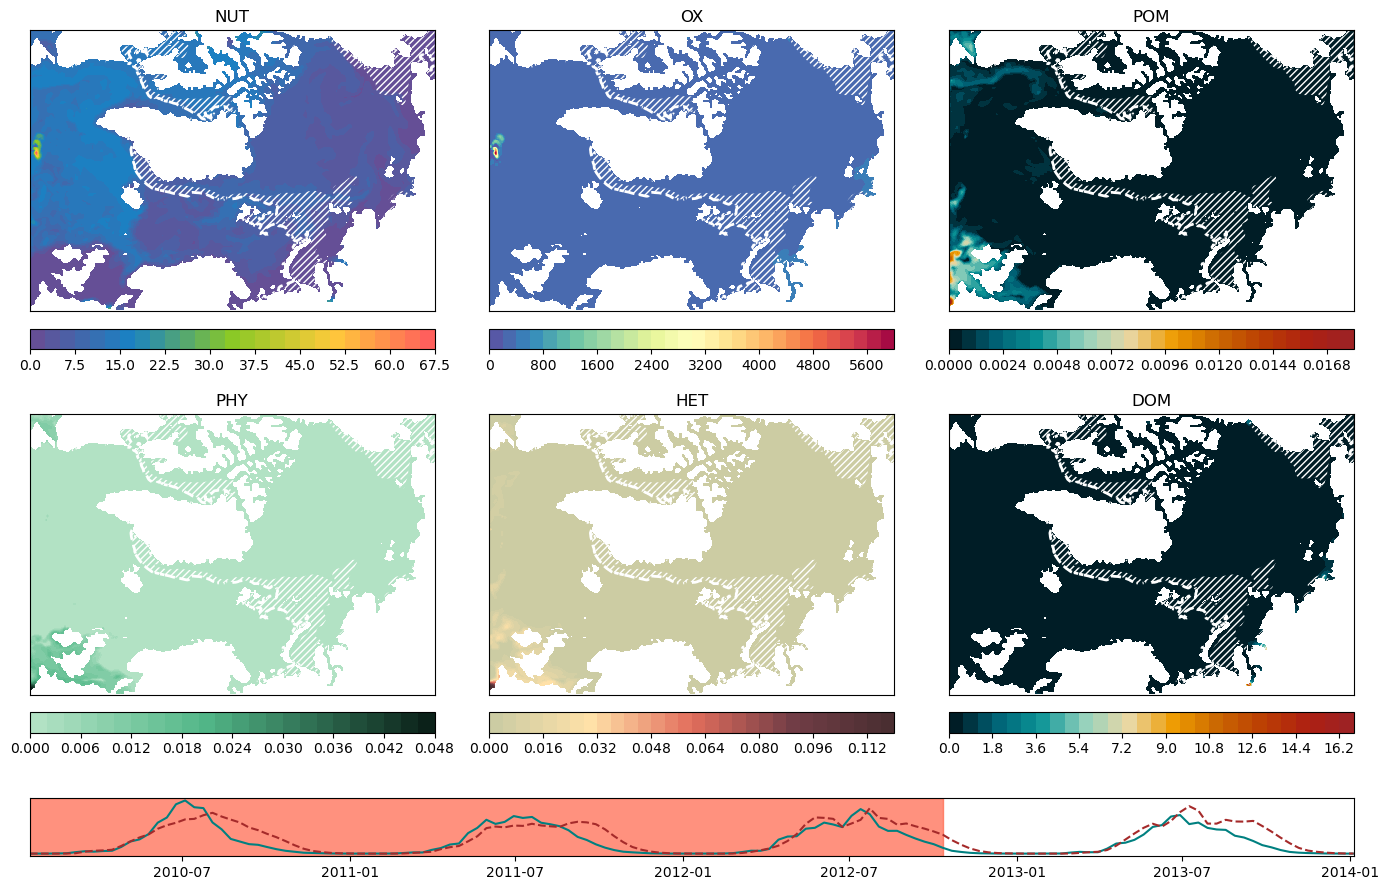

In [132]:
fig, axs = plt.subplots(3,3, figsize=(14,9), gridspec_kw={'height_ratios': (6,6,1)})

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

# NUT, OX
cf_nut = axs[0,0].contourf(nut[-1,:,:], cmap=nut_cmap, levels=30)
cf_ox = axs[0,1].contourf(ox[-1,:,:], cmap='Spectral_r', levels=30)
# Phy, Het
cf_phy = axs[1,0].contourf(phy[-1,:,:], cmap=phy_cmap, levels=30)
cf_het = axs[1,1].contourf(het[-1,:,:], cmap=het_cmap, levels=30)
# POM, DOM
cf_pom = axs[0,2].contourf(pom[-1,:,:], cmap=dom_cmap, levels=30)
cf_dom = axs[1,2].contourf(dom[-1,:,:], cmap=dom_cmap, levels=30)

for ax in axs.ravel():
    ax.contour(cice[-1,:,:], levels=[0.2], colors='w', linewidths=2, linestyles='--')
    ax.contourf(cice[-1,:,:], levels=[0.2,1], colors='w', alpha=0, hatches=['/////'])

names = ['NUT', 'OX', 'POM', 'PHY', 'HET', 'DOM']
cf_top = [cf_nut, cf_ox, cf_pom]
cf_bot = [cf_phy, cf_het, cf_dom]
for i, ax in enumerate(axs.ravel()[:6]):
    ax.set_title(names[i])
for cf, ax in zip(cf_top, axs[0,:]):
    fig.colorbar(cf, ax=ax, location='bottom', pad=0.05)
for cf, ax in zip(cf_bot, axs[1,:]):
    fig.colorbar(cf, ax=ax, location='bottom', pad=0.05)

gs = axs[2, 0].get_gridspec()
# remove the underlying axes
for ax in axs[2,:]:
    ax.remove()
axt = fig.add_subplot(gs[2,:])
axt.plot(ocean_time, np.nansum(phy, axis=(1,2)), color='teal')
axt.plot(ocean_time, np.nansum(het, axis=(1,2)), color='brown', ls='--')
axt.set_xlim(ocean_time[0], ocean_time[-1])
axt.axvspan(ocean_time[0], ocean_time[100], color='tomato', alpha=0.7)
axt.set_yticks([])

fig.tight_layout()

In [28]:
phy.shape

(146, 242, 322)

In [29]:
np.nanmax(dom)

34.704815

In [133]:
names = ['NUT', 'OX', 'POM', 'PHY', 'HET', 'DOM']
nut_levs = np.linspace(0,30,31)
ox_levs = np.linspace(200,700,51)
phy_levs = np.linspace(0,6,31)
het_levs = np.linspace(0,5,51)
pom_levs = np.linspace(0,2.5,51)
dom_levs = np.linspace(0,10,41)

In [134]:
physum = np.nansum(phy, axis=(1,2))
hetsum = np.nansum(het, axis=(1,2))

In [152]:
physum.shape

(146,)

In [163]:
for t in range(70,146):
    fig, axs = plt.subplots(3,3, figsize=(10,7), gridspec_kw={'height_ratios': (6,6,1)})
    
    for ax in axs.ravel():
        ax.set_xticks([])
        ax.set_yticks([])
    
    # NUT, OX
    cf_nut = axs[0,0].contourf(nut[t,:,:], cmap=nut_cmap, levels=nut_levs)
    cf_ox = axs[0,1].contourf(ox[t,:,:], cmap='Spectral_r', levels=ox_levs)
    # Phy, Het
    cf_phy = axs[1,0].contourf(phy[t,:,:], cmap=phy_cmap, levels=phy_levs)
    cf_het = axs[1,1].contourf(het[t,:,:], cmap=het_cmap, levels=het_levs)
    # POM, DOM
    cf_pom = axs[0,2].contourf(pom[t,:,:], cmap=dom_cmap, levels=pom_levs)
    cf_dom = axs[1,2].contourf(dom[t,:,:], cmap=dom_cmap, levels=dom_levs)
    
    # ICE
    for ax in axs.ravel():
        ax.contour(cice[t,:,:], levels=[0.2], colors='w', linewidths=2, linestyles='--')
        ax.contourf(cice[t,:,:], levels=[0.2,1], colors='w', alpha=0, hatches=['/////'])

    cf_top = [cf_nut, cf_ox, cf_pom]
    cf_bot = [cf_phy, cf_het, cf_dom]
    
    # Titles
    for i, ax in enumerate(axs.ravel()[:6]):
        ax.set_title(names[i])
    
    # Colorbars
    for cf, ax in zip(cf_top, axs[0,:]):
        fig.colorbar(cf, ax=ax, location='bottom', pad=0.05)
    for cf, ax in zip(cf_bot, axs[1,:]):
        fig.colorbar(cf, ax=ax, location='bottom', pad=0.05)
    
    # times
    gs = axs[2, 0].get_gridspec()
    # remove the underlying axes
    for ax in axs[2,:]:
        ax.remove()
    axt = fig.add_subplot(gs[2,:])
    axt.plot(ocean_time, physum, color='teal')
    axt.plot(ocean_time, hetsum, color='brown', ls='--')
    axt.plot(ocean_time[:t], physum[:t], color='teal', lw=4)
    axt.plot(ocean_time[:t], hetsum[:t], color='brown', ls='--', lw=4)
    
    axt.set_xlim(ocean_time[0], ocean_time[-1])
    axt.axvspan(ocean_time[0], ocean_time[t], color='tomato', alpha=0.7)
    axt.text(0.88, 1.06, 'PHY', color='teal', fontweight='bold', fontsize=14, transform=axt.transAxes)
    axt.text(0.95, 1.06, 'HET', color='brown', fontweight='bold', fontsize=14, transform=axt.transAxes)
    axt.set_yticks([])
    
    fig.tight_layout()
    plt.savefig(wdir + 'png_OD/all_{0:03}'.format(t), bbox_inches='tight', dpi=150)
    plt.close()

In [5]:
def make_gif(frame_folder, gifname):
    frames = [Image.open(image) for image in sorted(glob.glob(f"{frame_folder}/*.png"))]
    frame_one = frames[0]
    frame_one.save(gifname, format="GIF", append_images=frames,
               save_all=True, duration=200, loop=0)

In [6]:
make_gif(wdir + 'png_OD', 'OD.gif')